In [1]:
import numpy as np
import open3d as o3d
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

print(o3d.__version__)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
0.18.0


In [2]:
def draw_centers(centers, radius, color):
    spheres = []
    sphere_radius = radius 
    
    for point in centers:
        mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=sphere_radius)
        mesh_sphere.compute_vertex_normals()
        
        mesh_sphere.translate(point)
        
        spheres.append(mesh_sphere)
    
    all_spheres = o3d.geometry.TriangleMesh()
    for sphere in spheres:
        all_spheres += sphere
    
    all_spheres.paint_uniform_color(color) 
    
    o3d.visualization.draw_geometries([all_spheres])

In [4]:
dataset = 'Mitch'
num_frames = 15
num_points = 2000

In [12]:
#file_prefix = f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/basketball-output-max/basketball_{num_points}/test_mesh_0res_{num_points}_"
#file_prefix = f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/collision-output-max/collision_{num_points}/mesh_0res_{num_points}_"
#file_prefix = f"G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max-4000/Frame_00res_{num_points}_"
#file_prefix = fr"G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/basketball_player_fr0res_{num_points}_"
#file_prefix = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/impr/basketball_player_fr0impr_{num_points}_'
file_prefix = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/mitch_fr0res_{num_points}_'

file_extension = ".xyz"

max_distance_matrix = np.zeros((num_points, num_points))
offset = 0
for index in range(1, 16):
    print(index)
    all_points = []
    filename = f"{file_prefix}{index:03d}{file_extension}"
    with open(filename, 'r') as file:
        for line in file:
            points = list(map(float, line.split()))
            all_points.append(points)
        all_points = np.array(all_points)
        print(all_points[0])
        for i in range(num_points):
            #print("i: ", i)
            for j in range(i+1, num_points):
                if np.max(np.linalg.norm(all_points[i] - all_points[j], axis=0)) > max_distance_matrix[i, j]:
                    max_distance_matrix[i, j] = np.max(np.linalg.norm(all_points[i] - all_points[j], axis=0))
                
                max_distance_matrix[j, i] = max_distance_matrix[i, j]
    
    if (index == offset + 5 or index == offset + 10):
        np.savetxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Mitch-output-max-2000/Mitch_distance_matrix_{index-offset}_{num_points}.txt", max_distance_matrix)
print(all_points.__len__())


            
np.savetxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Mitch-output-max-2000/Mitch_distance_matrix_15_{num_points}.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/basketball-output-max/basketball_{num_points}/basketball_distance_matrix_{num_frames}_{num_points}_1519.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/collision-output-max/collision_{num_points}/collision_distance_matrix_{num_frames}_{num_points}_2630.txt", max_distance_matrix)
#np.savetxt(f"D:/arap-volume-tracking-main/arap-volume-tracking-main/data/dancer-output-max/dancer_{num_points}/dancer_distance_matrix_{num_frames}_{num_points}_0610.txt", max_distance_matrix)

print("Distance Matrix:")
print(max_distance_matrix, max_distance_matrix.shape)

1
[-0.24957313  1.3209778   0.1843    ]
2
[-0.2504001   1.3207499   0.18450025]
3
[-0.25164935  1.319309    0.18545482]
4
[-0.2537645  1.317122   0.1870209]
5
[-0.25701535  1.3139076   0.19016564]
6
[-0.26103336  1.310231    0.19376358]
7
[-0.26594186  1.3067155   0.19816095]
8
[-0.27182594  1.3038698   0.20310365]
9
[-0.27865642  1.3018713   0.20823514]
10
[-0.28651577  1.3004873   0.21360901]
11
[-0.2952988   1.2991495   0.21964458]
12
[-0.30469602  1.2977786   0.22636463]
13
[-0.3148325   1.2965353   0.23343885]
14
[-0.3252139   1.2947001   0.24123281]
15
[-0.33606604  1.2927574   0.24940649]
2000
Distance Matrix:
[[0.         0.64625123 0.61819289 ... 0.57154307 0.61064351 0.62889883]
 [0.64625123 0.         0.18446334 ... 0.28145562 0.41336285 0.04315344]
 [0.61819289 0.18446334 0.         ... 0.40177809 0.23860942 0.16273348]
 ...
 [0.57154307 0.28145562 0.40177809 ... 0.         0.60847868 0.30793634]
 [0.61064351 0.41336285 0.23860942 ... 0.60847868 0.         0.38160592]
 [0.6

In [14]:
num_frames = 10
num_points = 2000 

In [15]:
#Levi_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max-4000/Levi_distance_matrix_5_{num_points}.txt")
#Dancer_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/Dancer_distance_matrix_{num_frames}_{num_points}.txt")
Basket_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Basketball-output-max-2000/Basket_distance_matrix_{num_frames}_{num_points}.txt")
Mitch_distance_matrix = np.loadtxt(f"G:\VS2022Projects/arap-volume-tracking-main\data\Mitch-output-max-2000/Mitch_distance_matrix_{num_frames}_{num_points}.txt")
#print(Levi_distance_matrix, Levi_distance_matrix.__len__())
#print(Dancer_distance_matrix, Dancer_distance_matrix.__len__())
print(Mitch_distance_matrix, Mitch_distance_matrix.__len__())

[[0.         0.63015478 0.60509621 ... 0.5560944  0.60618617 0.61317429]
 [0.63015478 0.         0.1827705  ... 0.28075052 0.41026182 0.04315344]
 [0.60509621 0.1827705  0.         ... 0.40177809 0.23692112 0.16197377]
 ...
 [0.5560944  0.28075052 0.40177809 ... 0.         0.60847868 0.30725883]
 [0.60618617 0.41026182 0.23692112 ... 0.60847868 0.         0.3791582 ]
 [0.61317429 0.04315344 0.16197377 ... 0.30725883 0.3791582  0.        ]] 2000


C:\Users\Windows\anaconda3\envs\open3d\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


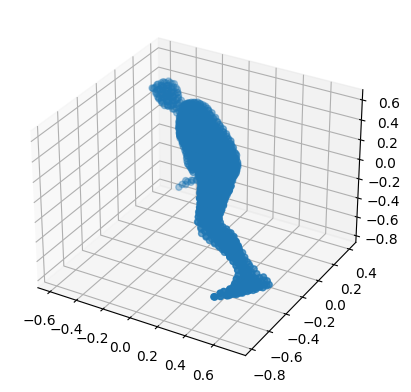

In [16]:
max_distance_matrix = Mitch_distance_matrix

mds = MDS(n_components=3, metric=True ,dissimilarity='precomputed', n_jobs=-1, eps= 1e-5, verbose=0, random_state=1, n_init = 6, max_iter = 300)
reference_centers = mds.fit_transform(max_distance_matrix)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reference_centers[:, 0], reference_centers[:, 1], reference_centers[:, 2])
plt.show()

[[-0.24957313  1.3209778   0.1843    ]
 [ 0.1194898   0.9942128  -0.19738628]
 [ 0.20033152  1.1561702  -0.17294498]
 ...
 [ 0.01488549  0.8597268   0.02493557]
 [ 0.21968347  1.3913907  -0.188694  ]
 [ 0.10474867  1.0319774  -0.21217659]] 2000


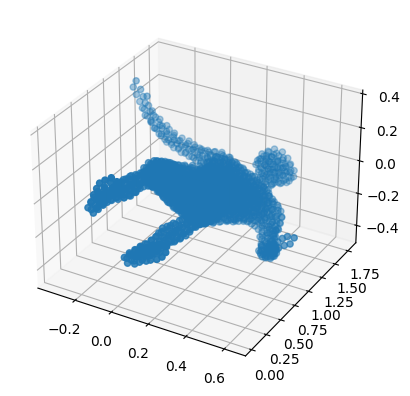

In [17]:
#center_filename_Levi = f'G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max-4000/Frame_00res_{num_points}_{i:03d}.xyz'
#center_filename_Dancer = f'G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/dancer_fr0res_{num_points}_{i:03d}.xyz'
#center_filename_basketball = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/basketball_player_fr0res_{num_points}_{i:03d}.xyz'
#center_filename_mitch = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/mitch_fr0res_{num_points}_{i:03d}.xyz'
center_datas = []
for i in range(1, 16):
    #center_filename = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/impr/basketball_player_fr0impr_{num_points}_{i:03d}.xyz'
    center_filename = fr'G:\VS2022Projects/arap-volume-tracking-main\data\{dataset}-output-max-2000/mitch_fr0res_{num_points}_{i:03d}.xyz'
    center_data = np.loadtxt(center_filename)
    center_datas.append(center_data)

center = center_datas[0]
print(center, center.__len__())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(center[:, 0], center[:, 1], center[:, 2])
plt.show()

In [11]:
draw_centers(center_datas[14], radius=0.01, color=[0.5, 0.5, 0.5])

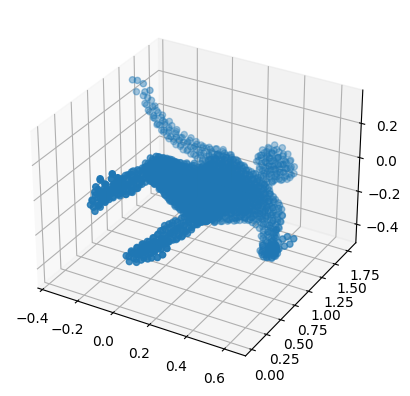

In [18]:
centers = center_datas[0]
reference_centers = reference_centers

centers_mean = np.mean(centers, axis=0)
reference_centers_mean = np.mean(reference_centers, axis=0)
centers_centered = centers - centers_mean
reference_centers_centered = reference_centers - reference_centers_mean

cov_matrix = np.dot(centers_centered.T, reference_centers_centered)

U, _, Vt = np.linalg.svd(cov_matrix)

R = np.dot(U, Vt)

reference_centers_aligned = np.dot(reference_centers_centered, R.T)

reference_centers_aligned = reference_centers_aligned + centers_mean

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reference_centers_aligned[:, 0], reference_centers_aligned[:, 1], reference_centers_aligned[:, 2])
plt.show()

In [19]:
draw_centers(reference_centers_aligned, 0.01, [0.5,0.5,0.5])

In [20]:
#output_filename = 'G:\VS2022Projects/arap-volume-tracking-main\data\Levi-output-max/reference_centers_aligned.xyz'
#output_filename = 'G:\VS2022Projects/arap-volume-tracking-main\data\Dancer-output-max-2000/reference_centers_aligned.xyz'
#output_filename = 'G:\VS2022Projects/arap-volume-tracking-main\data\Basketball-output-max-2000/reference_centers_aligned.xyz'
output_filename = 'G:\VS2022Projects/arap-volume-tracking-main\data\Mitch-output-max-2000/reference_centers_aligned.xyz'
np.savetxt(output_filename, reference_centers_aligned, fmt='%f', delimiter=' ')


with open(output_filename, 'r') as file:
    lines = file.readlines()
    print("".join(lines[:5])) 

-0.248184 1.322044 0.192816
0.119066 0.993971 -0.199209
0.200880 1.155506 -0.174794
0.272166 1.461307 -0.249924
0.116718 1.542117 -0.164022

